# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     831.1
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           4.69e-40
Time:                        01:09:53   Log-Likelihood:                -1.7955
No. Observations:                  50   AIC:                             11.59
Df Residuals:                      46   BIC:                             19.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9226      0.089     55.230      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.39743683  4.87376462  5.31246395  5.68793766  5.98382649  6.19569682
  6.33176914  6.41156739  6.46271131  6.51637851  6.60218214  6.74330551
  6.95269314  7.23092401  7.56611642  7.93588017  8.31099514  8.66021212
  8.95538696  9.17610455  9.313033    9.3694568   9.36073724  9.31178854
  9.25298456  9.21516843  9.22458513  9.29856949  9.44269816  9.64987335
  9.901489   10.17048769 10.42580611 10.63747866 10.78156071 10.84406265
 10.82324835 10.72992036 10.58564515 10.41920972 10.26189205 10.14232215
 10.08177829 10.09069102 10.16692943 10.29615129 10.45415943 10.61087725
 10.73529024 10.80054157]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.7739897  10.6223055  10.36390802 10.04077202  9.708151    9.4210493
  9.22075503  9.12473139  9.12234101  9.17745035]


## Plot comparison

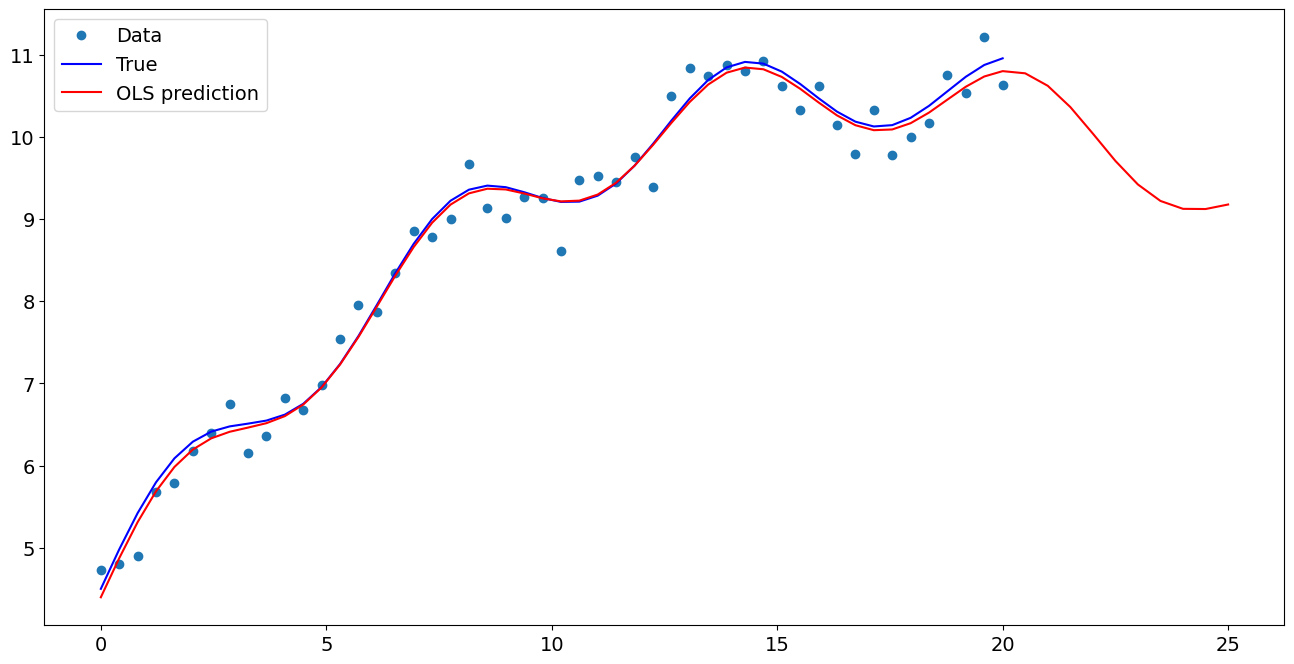

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.922580
x1                  0.508773
np.sin(x1)          0.469680
I((x1 - 5) ** 2)   -0.021006
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.773990
1    10.622305
2    10.363908
3    10.040772
4     9.708151
5     9.421049
6     9.220755
7     9.124731
8     9.122341
9     9.177450
dtype: float64